# EcoNex Data Visualization

This notebook visualizes the synthetic data profiles generated by the `src.preprocessing` module, including:

- Solar Generation
- Energy & Water Demand
- Supply Profiles (Rainwater)
- Electricity Prices

In [8]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Add src to path to import local modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from preprocessing import (
    generate_solar_profile,
    generate_demand_profiles,
    generate_supply_profiles,
    generate_price_profile
)

# Set plot style
try:
    plt.style.use(['science', 'ieee', 'grid'])
except:
    plt.style.use('ggplot')

## Generate Synthetic Data

In [9]:
T = 24  # 24 hours
nodes = [1, 2, 3]

# Generate all profiles
solar_profile = generate_solar_profile(T)
demand_profiles = generate_demand_profiles(T, nodes)
supply_profiles = generate_supply_profiles(T)
price_profile = generate_price_profile(T)

## 1. Solar Generation Profile

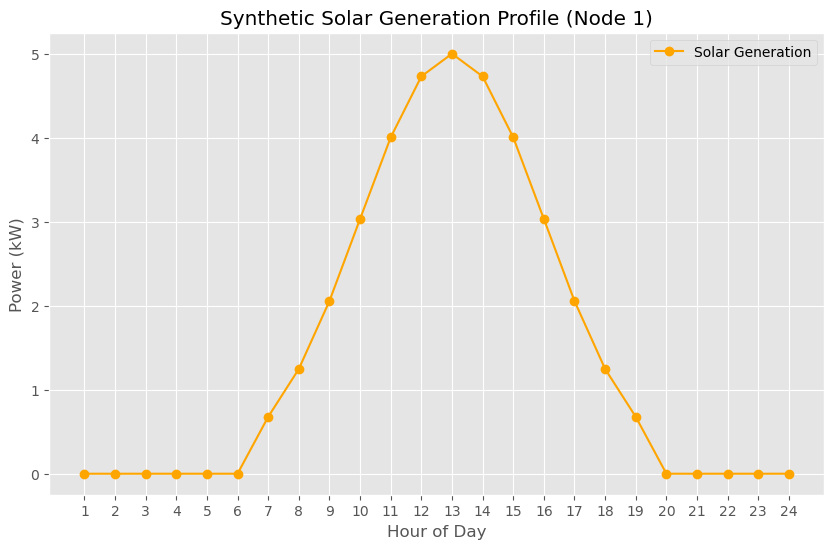

In [10]:
plt.figure(figsize=(10, 6))
hours = list(solar_profile.keys())
generation = list(solar_profile.values())

plt.plot(hours, generation, marker='o', label='Solar Generation', color='orange')
plt.title('Synthetic Solar Generation Profile (Node 1)')
plt.xlabel('Hour of Day')
plt.ylabel('Power (kW)')
plt.xticks(hours)
plt.legend()
plt.grid(True)
plt.show()

## 2. Demand Profiles (Energy)

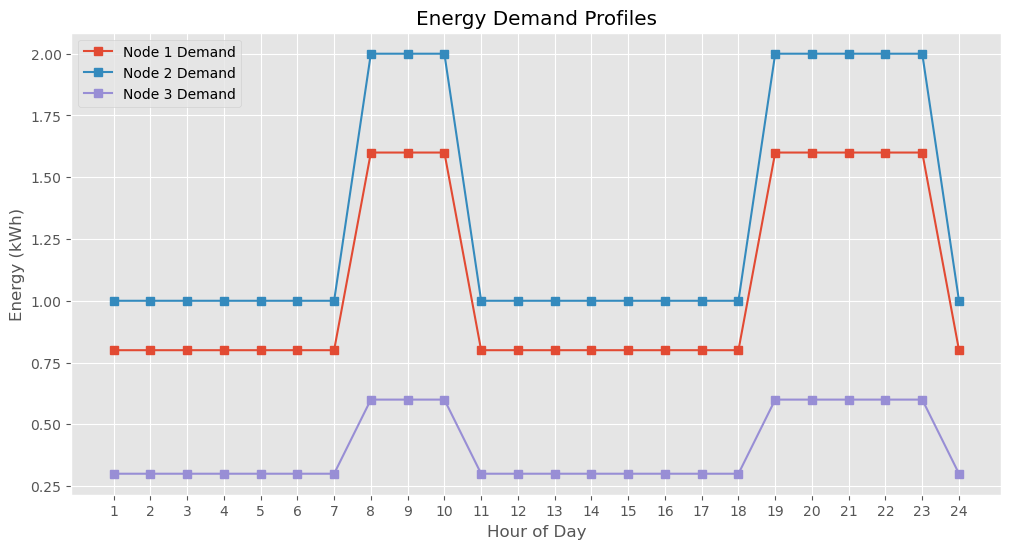

In [11]:
plt.figure(figsize=(12, 6))
hours = range(1, T + 1)

for node in nodes:
    # Demand is stored as negative values, negate to plot magnitude
    energy_demand = [-demand_profiles[node]['E'][t] for t in hours]
    plt.plot(hours, energy_demand, marker='s', label=f'Node {node} Demand')

plt.title('Energy Demand Profiles')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.xticks(hours)
plt.legend()
plt.grid(True)
plt.show()

## 3. Demand Profiles (Potable Water)

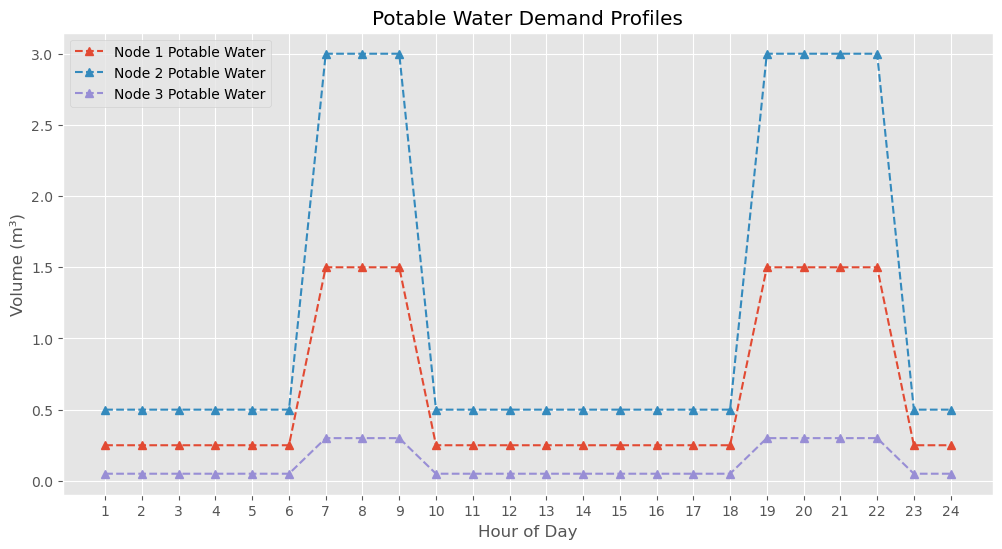

In [12]:
plt.figure(figsize=(12, 6))

for node in nodes:
    water_demand = [-demand_profiles[node]['P'][t] for t in hours]
    # Only plot if there is non-zero demand to reduce clutter
    if sum(water_demand) > 0:
        plt.plot(hours, water_demand, marker='^', linestyle='--', label=f'Node {node} Potable Water')

plt.title('Potable Water Demand Profiles')
plt.xlabel('Hour of Day')
plt.ylabel('Volume (m³)')
plt.xticks(hours)
plt.legend()
plt.grid(True)
plt.show()

## 4. Supply Profiles (Rainwater)

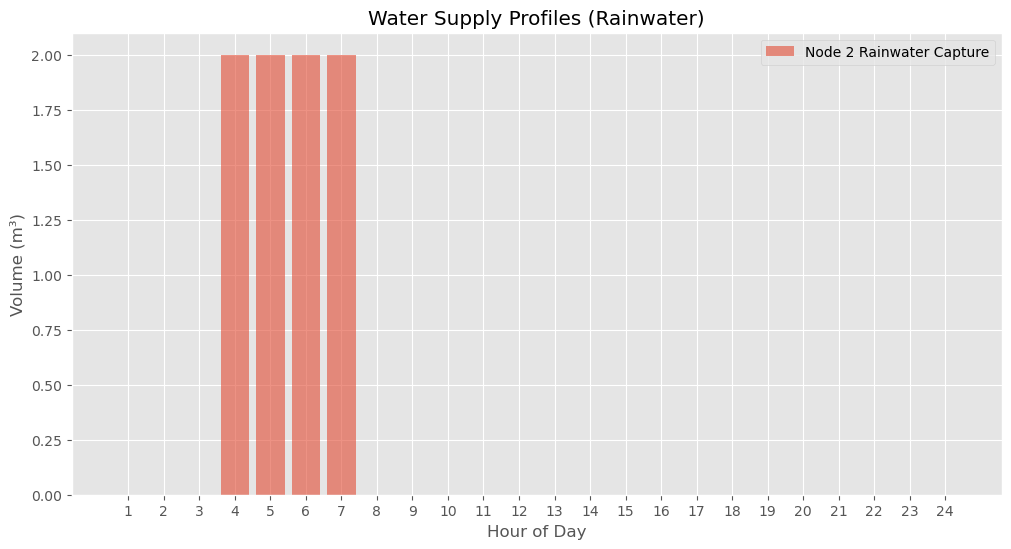

In [13]:
plt.figure(figsize=(12, 6))

for node in nodes:
    rain_supply = [supply_profiles[node]['W'][t] for t in hours]
    if sum(rain_supply) > 0:
        plt.bar(hours, rain_supply, label=f'Node {node} Rainwater Capture', alpha=0.6)

plt.title('Water Supply Profiles (Rainwater)')
plt.xlabel('Hour of Day')
plt.ylabel('Volume (m³)')
plt.xticks(hours)
plt.legend()
plt.grid(True)
plt.show()

## 5. Electricity Price Profile

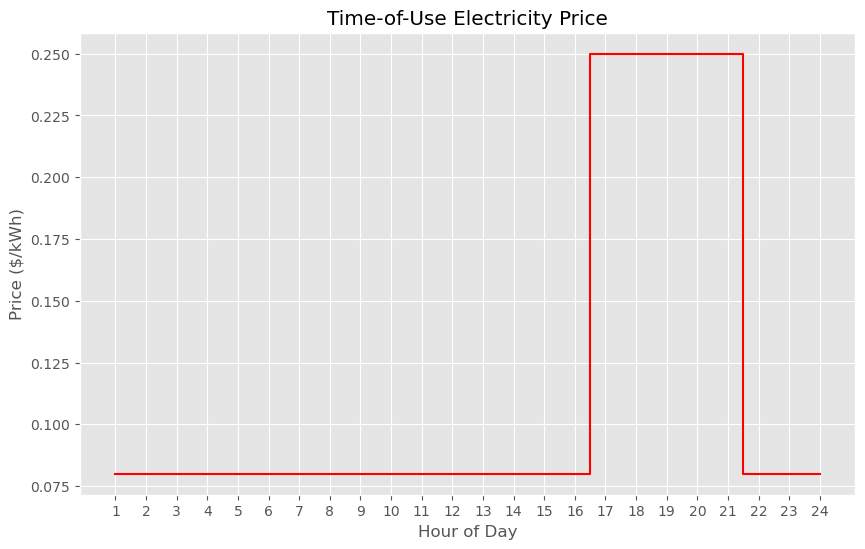

In [14]:
plt.figure(figsize=(10, 6))
prices = list(price_profile.values())

plt.step(hours, prices, where='mid', color='red', label='Grid Price')
plt.title('Time-of-Use Electricity Price')
plt.xlabel('Hour of Day')
plt.ylabel('Price ($/kWh)')
plt.xticks(hours)
plt.grid(True)
plt.show()